<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 
Author: Arina Lopukhova (@erynn). Edited by [Yury Kashnitskiy](https://yorko.github.io) (@yorko). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

<h1><center>Assignment #1. Fall 2018</center></h1>
<h2><center>Exploratory data analysis of Olympic games with Pandas</center></h2>

__There are ten questions about [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2) dataset in this task. Your task is to fill in the missing Python code and choose answers in [this web-form](https://docs.google.com/forms/d/179HYvlF_0x435CWdu2aOtR9a3flh0YCQXXNXhXaKw2M).__

Download the file `athlete_events.csv` from [Kaggle page](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). The dataset has the following features (copied from Kaggle):

- __ID__ - Unique number for each athlete
- __Name__ - Athlete's name
- __Sex__ - M or F
- __Age__ - Integer
- __Height__ - In centimeters
- __Weight__ - In kilograms
- __Team__ - Team name
- __NOC__ - National Olympic Committee 3-letter code
- __Games__ - Year and season
- __Year__ - Integer
- __Season__ - Summer or Winter
- __City__ - Host city
- __Sport__ - Sport
- __Event__ - Event
- __Medal__ - Gold, Silver, Bronze, or NA

In [1]:
import pandas as pd

In [2]:
# Change the path to the dataset file if needed. 
PATH = '../../data/athlete_events.csv'

In [3]:
data = pd.read_csv(PATH)
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


__1. How old were the youngest male and female participants of the 1996 Olympics?__

- 16 and 15
- 14 and 12 
- 16 and 12
- 13 and 11

In [10]:
data[ data['Year']==1996 ].groupby(['Sex'])['Age'].min()

Sex
F    12.0
M    14.0
Name: Age, dtype: float64

In [9]:
data[ data['Year']==1996 ].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
97,33,Mika Lauri Aarnikka,M,28.0,187.0,76.0,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Men's Two Person Dinghy,NaN
100,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 100 metres Butterfly,NaN
101,36,Stefan Remco Aartsen,M,21.0,194.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Swimming,Swimming Men's 200 metres Butterfly,NaN


__2. What was the percentage of male gymnasts among all the male participants of the 2000 Olympics? Consider only Gymnastics as a target sport. Round the answer to the first decimal.__

*Hint:* here and further if needed drop duplicated sportsmen to count only unique ones. 

- 0.2
- 1.5 
- 2.5
- 7.7

In [36]:
data[ (data['Year']==2000) & (data['Sex']=='M') & (data['Sport']=='Gymnastics') ]['Name'].nunique() # 97

97

In [39]:
data[ (data['Year']==2000) & (data['Sex']=='M') ]['Name'].nunique() #6576
print(97/6576*100)

1.4750608272506083


__3. What are the mean and standard deviation of height for female basketball players participated in the 2000 Olympics? Round the answer to the first decimal.__

- 178.5 and 7.2
- 179.4 and 10
- 180.7 and 6.7
- 182.4 and 9.1 

In [161]:
our = data[ (data['Year']==2000) & (data['Sex']=='F') & (data['Sport']=='Basketball') ] #4064

In [167]:
our['Height'].describe()

count    142.000000
mean     182.387324
std        9.139462
min      162.000000
25%      175.000000
50%      182.000000
75%      190.000000
max      213.000000
Name: Height, dtype: float64

__4. Find a sportsperson participated in the 2002 Olympics, with the highest weight among other participants of the same Olympics. What sport did he or she do?__

- Judo
- Bobsleigh 
- Weightlifting
- Boxing

In [168]:
data[ data['Year']==2002 ]['Weight'].describe()

count    4062.000000
mean       71.197070
std        13.257178
min        42.000000
25%        61.000000
50%        69.000000
75%        80.000000
max       123.000000
Name: Weight, dtype: float64

In [169]:
data[ (data['Year']==2002) & (data['Weight']==123) ]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
99154,50171,Emmanuel Hostache,M,26.0,190.0,123.0,France,FRA,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Two,NaN


__5. How many times did Pawe Abratkiewicz participate in the Olympics held in different years?__

- 0
- 1 
- 2
- 3 

In [173]:
data[ data['Name']=='Pawe Abratkiewicz' ]['Year'].nunique()

3

__6. How many silver medals in tennis did sportspeople from the Australia team win at the 2000 Olympics? Count every medal from every sportsperson.__

- 0
- 1 
- 2 
- 3 

In [192]:
#data[ (data['Team']=='Australia') & (data['Year']==2000) ].groupby(['Sport','Medal']).count()
data[ (data['Team']=='Australia') & (data['Year']==2000) & (data['Medal']=='Silver') & (data['Sport']=='Tennis') ]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
262820,131504,Todd Andrew Woodbridge,M,29.0,178.0,75.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Tennis,Tennis Men's Doubles,Silver
262831,131511,Mark Raymond Woodforde,M,34.0,183.0,80.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Tennis,Tennis Men's Doubles,Silver


__7. Is it true that Switzerland won fewer medals than Serbia at the 2016 Olympics? Do not consider NaN values in _Medal_ column.__ 

- Yes 
- No

In [195]:
data[ (data['Year']==2016) & ( (data['Team']=='Switzerland') | (data['Team']=='Serbia') ) ].groupby(['Team']).count()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal
Team,,,,,,,,,,,,,,
Serbia,127,127,127,127,127,127,127,127,127,127,127,127,127,54
Switzerland,148,148,148,148,148,148,148,148,148,148,148,148,148,11


__8. What age category did the fewest and the most participants of the 2014 Olympics belong to?__
- [45-55] and [25-35) correspondingly
- [45-55] and [15-25) correspondingly
- [35-45] and [25-35) correspondingly
- [45-55] and [35-45) correspondingly

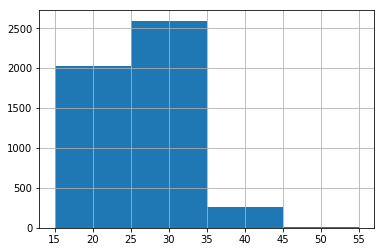

In [208]:
#data[ data['Year']==2014 ]['Age'].plot()
data[ data['Year']==2014 ].Age.hist(bins=(15,25,35,45,55))

__9. Is it true that there were Summer Olympics held in Lake Placid? Is it true that there were Winter Olympics held in Sankt Moritz?__

- Yes, Yes
- Yes, No
- No, Yes 
- No, No 

In [218]:
data.groupby(['City','Season'])['Year'].unique()
#data['Year'].max()

City                    Season
Albertville             Winter                [1992]
Amsterdam               Summer                [1928]
Antwerpen               Summer                [1920]
Athina                  Summer    [2004, 1906, 1896]
Atlanta                 Summer                [1996]
Barcelona               Summer                [1992]
Beijing                 Summer                [2008]
Berlin                  Summer                [1936]
Calgary                 Winter                [1988]
Chamonix                Winter                [1924]
Cortina d'Ampezzo       Winter                [1956]
Garmisch-Partenkirchen  Winter                [1936]
Grenoble                Winter                [1968]
Helsinki                Summer                [1952]
Innsbruck               Winter          [1964, 1976]
Lake Placid             Winter          [1980, 1932]
Lillehammer             Winter                [1994]
London                  Summer    [2012, 1948, 1908]
Los Angeles    

__10. What is the absolute difference between the number of unique sports at the 1996 Olympics and 2016 Olympics?__

- 3 
- 10
- 27
- 34 

In [221]:
data[ (data['Year']==1996) | (data['Year']==2016) ].groupby('Year')['Sport'].describe()

,count,unique,top,freq
Year,,,,
1996,13780,31,Athletics,2386
2016,13688,34,Athletics,2508
